In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss 
%matplotlib inline

In [2]:
## Distributions and Hypothesis Testing 

In [3]:
mean = 3.5 
sd = 0.76

In [4]:
nd = ss.norm(mean,sd)

In [5]:
nd

In [6]:
X = 2.6

In [9]:
2*nd.cdf(0.5)

7.9014917775632523e-05

In [11]:
def two_tails_plot(nd,X,mean,sd):

    

    x = np.linspace(mean-4*sd, mean+4*sd, 5000)

    y_cdf = ss.norm.pdf(x,3.5, 0.76)

    plt.plot(x, y_cdf, label='cdf')

    if X < mean:

        lo = mean-4*sd

        hi = X

        lo2 = (mean-X)+mean

        hi2 = mean+4*sd

    else:

        lo = mean-4*sd

        hi = (mean-X)+mean

        lo2 = X

        hi2 = mean+4*sd

    x = np.linspace(lo, hi, 5000)

    x2 = np.linspace(lo2, hi2, 5000)

    plt.fill_between(x, nd.pdf(x), y2=0, where= x >= lo , \

                     interpolate=False, \

                     color='blue', alpha = 0.2)

    plt.fill_between(x2, nd.pdf(x2), y2=0, where= x2 >= lo2 , \

                     interpolate=False, \

                     color='blue', alpha = 0.2)

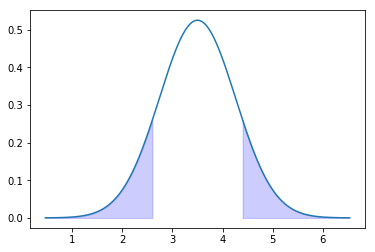

In [12]:
two_tails_plot(nd,X,mean,sd)

In [13]:
## ONE SIDED TEST 

In [16]:
mean = 1.03 
sd = 0.1 
nd = ss.norm(mean,sd)
X = 1.
n = 50

In [17]:
z = (X-mean)/(sd/np.sqrt(n))
print(z)

-2.12132034356


In [18]:
ss.norm.cdf(z)

0.01694742676234454

In [ ]:
## Student T Test
measuring thickness of steel plate 

In [21]:
X = np.array([1.316,1.308,1.321,1.303,1.311,1.310])

{'boxes': [<matplotlib.lines.Line2D at 0x185eef1cef0>],
 'caps': [<matplotlib.lines.Line2D at 0x185eed30f98>,
 'fliers': [<matplotlib.lines.Line2D at 0x185eeeb76d8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x185eeeb7710>],
 'whiskers': [<matplotlib.lines.Line2D at 0x185eef1ce48>,
  <matplotlib.lines.Line2D at 0x185eed30198>]}

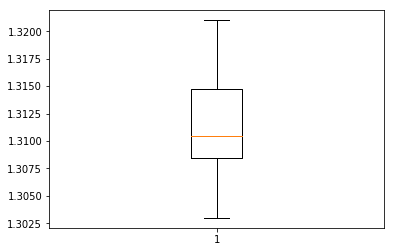

In [22]:
plt.boxplot(X)

In [23]:
mean = np.mean(X)
sd = np.std(X)
print(mean,sd)

1.3115 0.00573730482602


In [24]:
df = len(X)-1
alpha = 0.99

In [25]:
ss.t.interval(alpha,df,mean,ss.sem(X))

(1.3011543246307602, 1.3218456753692396)

In [26]:
X = np.array([1.316,1.308,1.321,1.303,1.311,1.310,2.5])

{'boxes': [<matplotlib.lines.Line2D at 0x185eefa8908>],
 'caps': [<matplotlib.lines.Line2D at 0x185eefb0390>,
 'fliers': [<matplotlib.lines.Line2D at 0x185eefb80f0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x185eefb0c50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x185eefa8a58>,
  <matplotlib.lines.Line2D at 0x185eefa8f28>]}

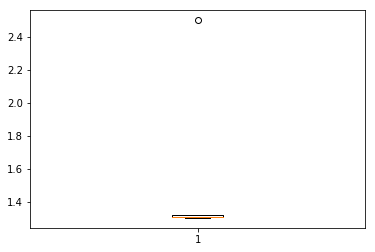

In [27]:
plt.boxplot(X)

In [41]:
from scipy.stats import sem, t
from scipy import mean
confidence = 0.90
data = [51,85]

In [42]:
n = len(data)
m = mean(data)
std_err = sem(data)
h = std_err*t.ppf((1+confidence)/2, n-1)

In [43]:
start = m - h
print(start)

-39.3337757516


In [44]:
end = m + h
print(end)

175.333775752


In [37]:
def mean_confidence_interval(data, confidence=0.90):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [40]:
ss.stats.t_ppf

AttributeError: module 'scipy.stats.stats' has no attribute 't_ppf'

In [45]:
X = 51
N = 85
p = round((X/N)*100,2)

In [46]:
p

60.0

In [47]:
alpha = .9
ss.beta.interval(alpha,X,N-X+1)

(0.50510058337622998, 0.67847109905462011)

In [50]:
def binom_CI(n,X,alpha):
    n_hat = n + 4 
    p_hat = (X+2) / n_hat
    
    z = ss.norm.ppf(1-alpha/2)
    
    ci = z*np.sqrt(p_hat*(1-p_hat)/n_hat)
    
    return np.array([p_hat-ci, p_hat+ci])

In [51]:
binom_CI(85,51,.1)

array([ 0.50993367,  0.68107757])